## Комментарий наставника
Привет! Меня зовут Александр и я буду проверять твой проект. Спасибо за твою работу:) Далее по ходу работы я оставлю свои комментарии и предложения. Постарайся их учесть в этом и дальнейших проектах. Комментарии ты можешь найти в текстовой ячейке с заголовком «Комментарий наставника» (как здесь) либо в ячейках с кодом в следующем виде: «#Комментарий наставника: <сам комментарий>». \
Часть комментариев может быть выделена цветом: \
<span style="color:green">Зелёный цвет символизирует, что всё отлично</span> \
<span style="color:orange">Оранжевый цвет символизирует рекомендации</span> \
<span style="color:red">Красный цвет символизирует недочёты</span>

<span style="color:green">Привет Александр ! Все сделал. Спасибо большое за помощь </span> 

<span style="color:green"> 29.06.2020Привет Александр ! Все сделал. Все заработало. </span> 

## Комментарий наставника
<span style="color:green">Был рад помочь!</span>

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

В избранном регионе ищут месторождения, для каждого определяют значения признаков;

Строят модель и оценивают объём запасов;

Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит 

от бюджета компании и стоимости разработки одной скважины;

Прибыль равна суммарной прибыли отобранных месторождений.

 
<span style="color:green">.Привет! Я немного заморочился , сделал чуть по другому.</span>

# 1. Загрузка и подготовка данных

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

from scipy import stats as st

In [30]:
geo_data = []
#geo_data.append(pd.read_csv('geo_data_0.csv'))
#geo_data.append(pd.read_csv('geo_data_1.csv'))
#geo_data.append(pd.read_csv('geo_data_2.csv'))
geo_data.append(pd.read_csv('/datasets/geo_data_0.csv'))
geo_data.append(pd.read_csv('/datasets/geo_data_1.csv'))
geo_data.append(pd.read_csv('/datasets/geo_data_2.csv'))

In [31]:
#field_0 = pd.read_csv('geo_data_0.csv')
#field_1 = pd.read_csv('geo_data_1.csv')
#field_2 = pd.read_csv('geo_data_2.csv')
field_0 = pd.read_csv('/datasets/geo_data_0.csv')
field_1 = pd.read_csv('/datasets/geo_data_1.csv')
field_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [32]:
for data in geo_data:
    print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
mem

## Комментарий наставника
<span style="color:green">Данные получены, приступим к работе.</span>

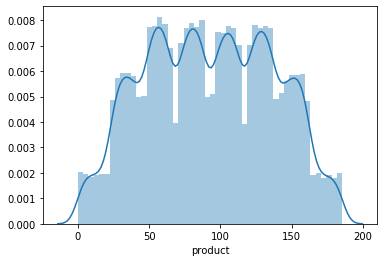

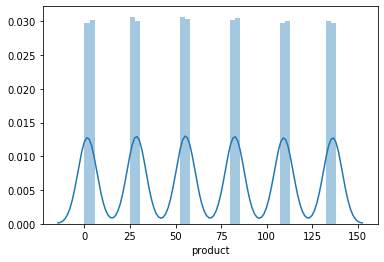

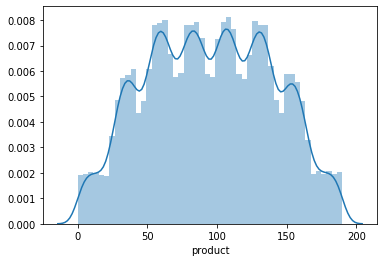

In [33]:
features = []
target = []
for data in geo_data:
    features.append(data.drop(['id', 'product'], axis=1))
    target.append(data['product'])
    plt.figure()
    sns.distplot(target[-1], bins=50)

In [34]:
geo_data[1].loc[:,'f0':].corr()['product']

f0        -0.030491
f1        -0.010155
f2         0.999397
product    1.000000
Name: product, dtype: float64

#### Выводы:

1. C данными все в порядке . Не нужно предварительной обработки
2. Удалили id признак так как не несет доп. информации
3. Значения целевого признака во втором регионе распределены не равномерно 

## Комментарий наставника
<span style="color:green">Все действия логичны, с выводами согласен. Идём далее.</span>

# 2. Обучение и проверка модели

#### 2.Обучите и проверьте модель для каждого региона: 
    
2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    
2.2. Обучите модель и сделайте предсказания на валидационной выборке.

2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

2.5. Проанализируйте результаты

1 Region: RMSE = 37.76, mean product = 92.40
2 Region: RMSE = 0.89, mean product = 68.71
3 Region: RMSE = 40.15, mean product = 94.77


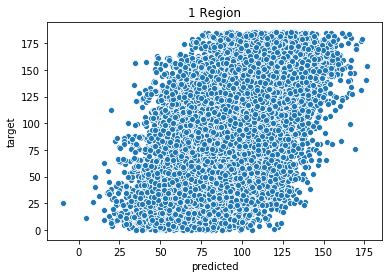

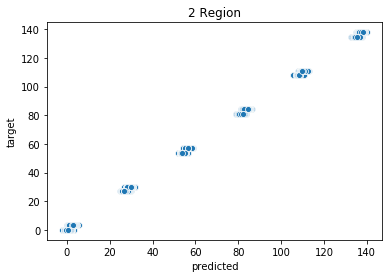

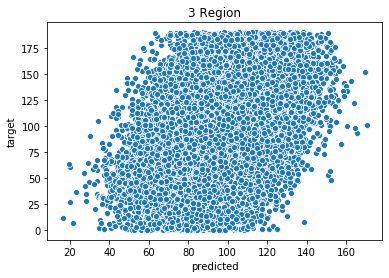

In [35]:
scaler = StandardScaler()
models = []
predicts = []
val_targets = []
for ind in range(len(features)):
    # разделим на тренировку и валидацию
    X_train, X_val, y_train, y_val = train_test_split(features[ind], target[ind], train_size=.75, random_state=42)
    # Стандартизируем данные
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    # Создадим и обучим модел
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Получим предсказания и выведем RMSE и среднее значение 
    predicted = model.predict(X_val)
    plt.figure()
    sns.scatterplot(x=predicted, y=y_val.values)
    plt.xlabel('predicted')
    plt.ylabel('target')
    plt.title(f'{ind+1} Region')
    rmse = mse(y_val, predicted)**0.5
    print(f'{ind+1} Region: RMSE = {rmse:.2f}, mean product = {predicted.mean():.2f}')
    # Добавим обученную модель и предсказания в списки
    val_targets.append(y_val.reset_index(drop=True))
    models.append(model)
    predicts.append(predicted)

### <span style="color:green">Новый вариант .</span>

In [36]:
'''
Функция, которая принимает датасет и модель, далее разбивает датасет на целевую перменную и признаки, обучается на модели
и возвращает предсказания и RMSE
'''
def model_prediction(data):
    model = LinearRegression()
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
    predicted = pd.Series(model.fit(X_train, y_train).predict(X_test), index=y_test.index)
    score = mean_squared_error(y_test, predicted) ** 0.5
    return y_test, predicted, score

In [37]:
'''from sklearn.metrics import mean_squared_error

#Получим предсказания и RMSE по трем месторождениям
target_field_0, pred_field_0, rmse_field_0 = model_prediction(field_0)
target_field_1, pred_field_1, rmse_field_1 = model_prediction(field_1)
target_field_2, pred_field_2, rmse_field_2 = model_prediction(field_2)'''

'from sklearn.metrics import mean_squared_error\n\n#Получим предсказания и RMSE по трем месторождениям\ntarget_field_0, pred_field_0, rmse_field_0 = model_prediction(field_0)\ntarget_field_1, pred_field_1, rmse_field_1 = model_prediction(field_1)\ntarget_field_2, pred_field_2, rmse_field_2 = model_prediction(field_2)'

In [38]:
'''#Для удобного представления упакуем наши результаты в DataFrame
results = pd.DataFrame(data=[[pred_field_0.mean(), rmse_field_0], 
                             [pred_field_1.mean(), rmse_field_1], 
                             [pred_field_2.mean(), rmse_field_2]],
                       index=['Месторождение fields_0', 'Месторождение fields_1','Месторождение fields_2'], 
                       columns=['Предсказанный средний запас сырья', 'RMSE модели'])'''
'''results'''

'results'

## Комментарий наставника
<span style="color:green">Прекрасно! Молодец, что использовал цикл. Всё получилось компактно и здорово. За графики отдельный бонус:)</span> \
<span style="color:orange">Однако `StandardScaler` можно было не использовать. Мы проводим масштабирование только для тех признаков, где наблюдается значительный разброс в значениях (например, от нуля до миллиона). Как ты можешь заметить, в нашем датасете разброс значений у признаков минимальный, поэтому масштабирование не улучшит (но и не ухудшит) работу модели.</span> \
<span style="color:green">UPD 27.06.2020 Отлично!</span>

#### Выводы:

Мы видим , что значения RMSE для первого и третьего регионов получились довольно большие, это говорит о том, что модель плохо справляется с предсказанием.  

## Комментарий наставника
<span style="color:green">Да, всё так. Переходим к следующему этапу работы.</span>

# 3. Подготовка к расчёту прибыли

#### 3. Подготовьтесь к расчёту прибыли:
    
3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.

3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним 
запасом в каждом регионе.

3.3. Напишите выводы по этапу подготовки расчёта прибыли.

In [39]:
BUDGET = 10 # Бюджет на разработку месторождений, млрд руб
DRILLING_COST = 0.05 # Cтоимость бурения одной скважины, млрд руб
BARREL_PROFIT = 450 / 1e+6 # Прибыль с одной тысячи баррелей сырья, млрд руб
MAX_RISK = 0.025 # Максимальный риск убытка проценты
drilling_count = int(BUDGET / DRILLING_COST) # Максимальное количество разрабаытваемых месторождений
 
print('Максимальное кол-ство разрабатываемых месторождений', drilling_count)

Максимальное кол-ство разрабатываемых месторождений 200


In [40]:
min_requaired_product = DRILLING_COST / BARREL_PROFIT
print('Минимальный средний объем, необходимый для разработки месторождения,', end=' ')
print(f'равен {min_requaired_product:.2f} тысяч баррелей')

Минимальный средний объем, необходимый для разработки месторождения, равен 111.11 тысяч баррелей


Мы видим следующую картину:

1 Region:mean product = 92.40 тыс баррелей

2 Region:mean product = 68.71 тыс баррелей 

3 Region:mean product = 94.77  тыс баррелей 

Получается все регионы убычточны 

## Комментарий наставника
<span style="color:orange">UPD 27.06.2020 Убыточны в том случае, если выбирать месторождения для разработки «наугад».</span>

только для 200 месторождений

In [41]:
'''def compute_profit(product, target):
    prod = pd.Series(product==200).sort_values(ascending=False) 
    index = prod.index[:drilling_count]
    return (target.loc[index] * BARREL_PROFIT - DRILLING_COST).sum() '''

'def compute_profit(product, target):\n    prod = pd.Series(product==200).sort_values(ascending=False) \n    index = prod.index[:drilling_count]\n    return (target.loc[index] * BARREL_PROFIT - DRILLING_COST).sum() '

Те так ? 

In [42]:
'''def compute_profit(product, target):
    prod = pd.Series(product).sort_values(ascending=False)[:200] 
    index = prod.index[:drilling_count]
    return (target.loc[index] * BARREL_PROFIT - DRILLING_COST).sum() '''

'def compute_profit(product, target):\n    prod = pd.Series(product).sort_values(ascending=False)[:200] \n    index = prod.index[:drilling_count]\n    return (target.loc[index] * BARREL_PROFIT - DRILLING_COST).sum() '

Или так ?

In [43]:
'''# функция по  для расчёта прибыли по набору отобранных месторождений 

def compute_profit(product, target):
    poins200 = product.sort_values(ascending=False)[:200]
    return poins200.sum() * 1000 * 450 - 10000000000'''

'# функция по  для расчёта прибыли по набору отобранных месторождений \n\ndef compute_profit(product, target):\n    poins200 = product.sort_values(ascending=False)[:200]\n    return poins200.sum() * 1000 * 450 - 10000000000'

## Комментарий наставника
<span style="color:green">UPD 28.06.2020 Я помогу тебе с функцией (это действительно непростой момент в проекте, я согласен), но в следующий раз постарайся, пожалуйста, сам прийти к верному решению:) \
Функция ниже: тебе осталось только добавить её в Bootstrap и сделать выводы.</span>

In [44]:
def compute_profit(product, target):
    preds_sorted = pd.Series(product).sort_values(ascending=False) #сортируем вектор прогнозных значений
    indices = preds_sorted.index #сохраняем индексы
    best_target = target.loc[indices][:200] #отбираем по индексам ровно 200 скважин
    profit = best_target.sum() * BARREL_PROFIT - BUDGET #считаем прибыль
    return profit

## Комментарий наставника
<span style="color:red">UPD 28.06.2020 Сейчас ты создаёшь Series, состоящую из булевых значений (True/False), где True сигнализирует равенство значения в векторе указанному тобой (200), а False — наоборот. См. ниже пример. В итоге у тебя сортировка не сработает. Попробуй отобрать 200 значений не во время отбора индексов вектора предсказанных значений, как сейчас, а во время отбора скважин из вектора целевых значений.</span>

In [45]:
pred_samples = pd.Series(predicts[0]).sample(n=500, replace=True, random_state=12345)
target_samples = val_targets[0][pred_samples.index]

preds_sorted = pd.Series(pred_samples).sort_values(ascending=False) #сортируем вектор прогнозных значений
indices = preds_sorted.index #сохраняем индексы
best_target = target_samples.loc[indices][:200] #отбираем по индексам ровно 200 скважин
best_target #теперь ровно 200

17668    123.665790
6823     154.105092
15568    156.667454
4174     126.960826
519      176.668233
            ...    
1682      34.260434
11360     70.944615
22668     84.011794
21567    123.479169
18825     50.690122
Name: product, Length: 200, dtype: float64

### <span style="color:green">Новый вариант .</span>

In [46]:
'''#Максимальное количество разведываемых скважин
MAXIMUM_NUMBERS_OF_WELLS = 500

#Максимальный бюджет на разработку
BUDGET = 10 * 10**9

#Стоимость разработки одной скважины
BUDGET_TO_ONE_WELL = 50 * 10**6

#Стоимость тысячи баррелей нефти
PROFIT_TO_THOUSAND_BARREL = 450 * 1000

#Максимальное количество скважин, которое возможно разработать в рамках бюджета
MAXIMUM_EXPLORED_WELL = BUDGET / BUDGET_TO_ONE_WELL'''

'#Максимальное количество разведываемых скважин\nMAXIMUM_NUMBERS_OF_WELLS = 500\n\n#Максимальный бюджет на разработку\nBUDGET = 10 * 10**9\n\n#Стоимость разработки одной скважины\nBUDGET_TO_ONE_WELL = 50 * 10**6\n\n#Стоимость тысячи баррелей нефти\nPROFIT_TO_THOUSAND_BARREL = 450 * 1000\n\n#Максимальное количество скважин, которое возможно разработать в рамках бюджета\nMAXIMUM_EXPLORED_WELL = BUDGET / BUDGET_TO_ONE_WELL'

In [47]:
'''MIN_MEAN_VOLUME_MINING = BUDGET / (MAXIMUM_EXPLORED_WELL * PROFIT_TO_THOUSAND_BARREL)
print('Минимальный средний объем сырья в месторождениях региона: {:.2f} тыс. баррелей'.format(MIN_MEAN_VOLUME_MINING))'''

"MIN_MEAN_VOLUME_MINING = BUDGET / (MAXIMUM_EXPLORED_WELL * PROFIT_TO_THOUSAND_BARREL)\nprint('Минимальный средний объем сырья в месторождениях региона: {:.2f} тыс. баррелей'.format(MIN_MEAN_VOLUME_MINING))"

## Комментарий наставника
<span style="color:red">У тебя есть ошибка при расчёте значения одной из констант. Перепроверь внимательно на основе данных из условия.</span> \
<span style="color:green">UPD 27.06.2020 Теперь всё верно.</span>

## Комментарий наставника
<span style="color:red">Обрати внимание на то, что у тебя может быть высчитана прибыль с большего чем 200 числа месторождений (см. ниже, получилось 208 скважин). Тебе нужно немного изменить свою функцию расчёта прибыли. \
Также не забудь добавить в этот блок проекта сравнение минимального объема сырья в месторождении для его окупаемости со средними значениями объемов сырья в месторождениях регионов из предыдущего пункта работы.</span>

In [48]:
'''pred_samples = pd.Series(predicts[0]).sample(n=500, replace=True, random_state=12345)
target_samples = val_targets[0][pred_samples.index]

prod = pd.Series(pred_samples).sort_values(ascending=False)
index = prod.index[:drilling_count]
target_samples.loc[index]'''

'pred_samples = pd.Series(predicts[0]).sample(n=500, replace=True, random_state=12345)\ntarget_samples = val_targets[0][pred_samples.index]\n\nprod = pd.Series(pred_samples).sort_values(ascending=False)\nindex = prod.index[:drilling_count]\ntarget_samples.loc[index]'

### <span style="color:green">Новый вариант .</span>

In [49]:
'''#Максимальное количество разведываемых скважин
MAXIMUM_NUMBERS_OF_WELLS = 500

#Максимальный бюджет на разработку
BUDGET = 10 * 10**9

#Стоимость разработки одной скважины
BUDGET_TO_ONE_WELL = 50 * 10**6

#Стоимость тысячи баррелей нефти
PROFIT_TO_THOUSAND_BARREL = 450 * 1000

#Максимальное количество скважин, которое возможно разработать в рамках бюджета
MAXIMUM_EXPLORED_WELL = BUDGET / BUDGET_TO_ONE_WELL'''

'#Максимальное количество разведываемых скважин\nMAXIMUM_NUMBERS_OF_WELLS = 500\n\n#Максимальный бюджет на разработку\nBUDGET = 10 * 10**9\n\n#Стоимость разработки одной скважины\nBUDGET_TO_ONE_WELL = 50 * 10**6\n\n#Стоимость тысячи баррелей нефти\nPROFIT_TO_THOUSAND_BARREL = 450 * 1000\n\n#Максимальное количество скважин, которое возможно разработать в рамках бюджета\nMAXIMUM_EXPLORED_WELL = BUDGET / BUDGET_TO_ONE_WELL'

In [50]:
'''MIN_MEAN_VOLUME_MINING = BUDGET / (MAXIMUM_EXPLORED_WELL * PROFIT_TO_THOUSAND_BARREL)
print('Минимальный средний объем сырья в месторождениях региона: {:.2f} тыс. баррелей'.format(MIN_MEAN_VOLUME_MINING))'''

"MIN_MEAN_VOLUME_MINING = BUDGET / (MAXIMUM_EXPLORED_WELL * PROFIT_TO_THOUSAND_BARREL)\nprint('Минимальный средний объем сырья в месторождениях региона: {:.2f} тыс. баррелей'.format(MIN_MEAN_VOLUME_MINING))"

## Комментарий наставника
<span style="color:orange">UPD 28.06.2020 У тебя эта часть кода полностью дублирует код чуть выше.</span>

In [51]:
'''
Функция, которая принимает массив с предсказанным объемом нефти и количеством скважин, а возвращает упорядоченный по
убыванию массив предполагаемой прибыли (в млн. рублей) со скважины .
'''
'''def revenue_mining(predicted, count):
    return (PROFIT_TO_THOUSAND_BARREL * predicted[:count] - BUDGET_TO_ONE_WELL)'''

'def revenue_mining(predicted, count):\n    return (PROFIT_TO_THOUSAND_BARREL * predicted[:count] - BUDGET_TO_ONE_WELL)'

## Комментарий наставника
<span style="color:red">UPD 27.06.2020 Нет, у тебя всё было абсолютно верно в предыдущей версии работы, когда ты отбирал месторождения по предсказанным значениям, а прибыль считал с фактического объема нефти в этих скважинах. Мы же не просто так попросили тебя сохранить на этапе обучения моделей как вектор с реальными значениями по объемам нефти, так и с прогнозными. Тебе просто надо было исправить свою функцию таким образом, чтобы она считала прибыль только для 200 месторождений, а не большего их числа.</span>

#### Выводы:

1. Мы подготовили переменные для расчета прибыли 

2. Расчитали минимальный объем необходимый для разработки месторождения. Минимальный средний объем равен 111.11  тыс. баррелей ,
а средние запасы сырья 

1 Region = 92.40 тыс . барр 

2 Region = 68.71 тыс . барр

3 Region: = 94.77 тыс . барр

# 4. Расчёт прибыли и рисков 

4 . Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
    
4.1. Выберите скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины.

4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.

In [52]:
state = np.random.RandomState(42)
bootstrap_steps = 1000
n_samples = 500

for ind in range(len(predicts)):
    profits = []
    for _ in range(bootstrap_steps):
        pred_samples = pd.Series(predicts[ind]).sample(n=n_samples, replace=True, random_state=state)
        target_samples = val_targets[ind][pred_samples.index]
        profits.append(compute_profit(pred_samples, target_samples))
    profits = pd.Series(profits)
    lower_bound = profits.quantile(MAX_RISK)
    confidence_interval = st.t.interval(alpha=0.95, df=profits.shape[0]-1, loc=profits.mean(), scale=profits.sem())
    risk = st.percentileofscore(profits, 0.0)
    print(f'Средняя прибыль c {ind+1} региона:', profits.mean())
    print(f'Границы 95% доверительного интервала', confidence_interval)
    print(f'Вероятность получить убыток:', risk)
    print('-'*50)

Средняя прибыль c 1 региона: 0.42784756046252437
Границы 95% доверительного интервала (0.41108020943786316, 0.44461491148718557)
Вероятность получить убыток: 5.5
--------------------------------------------------
Средняя прибыль c 2 региона: 0.5115302181485241
Границы 95% доверительного интервала (0.49805303072220597, 0.5250074055748422)
Вероятность получить убыток: 0.6
--------------------------------------------------
Средняя прибыль c 3 региона: 0.4085456812149354
Границы 95% доверительного интервала (0.39122820786127244, 0.42586315456859836)
Вероятность получить убыток: 7.5
--------------------------------------------------


## Комментарий наставника
<span style="color:red">UPD 29.06.2020 Что не так: функция `compute profit` вызывает константы `BARREL_PROFIT` и `BUDGET`. Но у тебя 2 решения идут подряд, в одном из них ты выражаешь величину в млрд рублей (`BARREL_PROFIT`), а в другой — в рублях (`BUDGET`) из нового варианта работы, как он у тебя назван. Ты можешь сам проследить это по коду в проекте. В итоге у тебя действия происходят с данными разной размерности, что привело к ошибке. Согласись, что средние прибыли и вероятности убытков на данный момент выглядят уж очень странными.</span>

 .  
1. Обучена модель по каждому из регионов и результаты получились следующие: 
    
2. Первый  регион - корень из среднеквадратичной ошибки (RMSE) равен 37.76.Это означает что модель в среднем ошибается на 37.76 

тысяч баррелей. Очень плохой результат с учетом того что среднее значение объема месторождений получилось 92.4 тысяч 

баррелей . Второй  регион - RMSE = 0.89 тысяч баррелей - хороший результат. Среднее щначение объема месторождений - 68.71 тысяч  
баррелей Третии регион - RMSE = 40.15 тысяч баррелей. Плохой результат. Среднее значение объема месторождений 94.77 тысяч 

баррелей

3. Былорасчитано максимальное колличество разрабатываемых месторождений, изходя из бюджета в 10 млрд рублей и  

разработки одной скважены 0.05 млрд рублей, равное 200. 

4 . Минимально необходимый объем для безубыточной добычи равен  

5. Мы получили данные, что все регионы убыточны. Наименньшии убыток (если можно так сказать показывает 2 - регион)

## Комментарий наставника
<span style="color:orange">UPD 29.06.2020 Хорошо, только с учётом исправлений у нас все регионы так или иначе прибыльны, но регион №2 является лучшим с точки зрения прибыльности и минимального риска убытков, да.</span>

##  <span style="color:green">Новый вариант .</span>

In [53]:
'''def bootstrap_sample(predicted, n_well=500, n_explored=200):
    
    state = np.random.RandomState(45)    
    total_values = []
    minus_values = []
    proba_minus_values = []
    
    for i in range(1000):
        #Выбираем n_well произвольных скважин 
        prediction_sample = predicted.sample(n=n_well, replace=True, random_state=state)
        
        #Считаем прибыль n_explored скважинам из n_well выбранных
        total_revenue = revenue_mining(prediction_sample, n_explored)
        
        #выбираем из выборки скважины с отрицательной доходностью
        minus_revenue = total_revenue[total_revenue<=0]
        
        #Считаем вероятность получить убыток
        proba_minus_revenue = len(minus_revenue) / len(total_revenue)
        
        #Сохраним прибыль
        total_values.append(total_revenue.sum())
        
        #Coхраним убытки
        minus_values.append(minus_revenue.sum())
        
        #Сохраним вероятности убытков
        proba_minus_values.append(proba_minus_revenue)
        

    #массивы приведем к Series значений в млн. рублей
    total_values = pd.Series(total_values) / 1000000
    minus_values = pd.Series(minus_values) / 1000000
    proba_minus_values = pd.Series(proba_minus_values)
    
    #Cредняя прибыль
    total_mean = total_values.mean() 
    #Нижняя граница доверительного интервала средней прибыли
    lower_total_mean = round(total_values.quantile(.025), 2)
    #Верхняя граница доверительного интервала средней прибыли
    higher_total_mean = round(total_values.quantile(.975), 2)
    
    #Cредний убыток
    minus_values_mean = minus_values.mean()
    #Нижняя граница доверительного интервала среднего убытка
    lower_minus_values = round(minus_values.quantile(.025), 2)
    #Верхняя граница доверительного интервала среднего убытка
    higher_minus_values = round(minus_values.quantile(.975), 2)
    
    #Cредняя вероятность получить убыток
    proba_minus_values_mean = proba_minus_values.mean()
    #Нижняя граница доверительного интервала вероятности убытка
    lower_proba_minus_values = round(proba_minus_values.quantile(.025), 2)
    #Верхняя граница доверительного интервала вероятности убытка
    higher_proba_minus_values = round(proba_minus_values.quantile(.975), 2)

    return pd.DataFrame(data=[[total_mean], [(lower_total_mean, higher_total_mean)], 
                              [minus_values_mean], [(lower_minus_values, higher_minus_values)], 
                              [proba_minus_values_mean], [(lower_proba_minus_values, higher_proba_minus_values)]], 
                        index=['Средняя прибыль', 'Доверительный интервал средней прибыли', 
                               'Cредний убыток', 'Доверительный интервал среднего убытка', 
                               'Cредняя вероятность убыта', 'Доверительный интервал вероятности убытка'])'''

"def bootstrap_sample(predicted, n_well=500, n_explored=200):\n    \n    state = np.random.RandomState(45)    \n    total_values = []\n    minus_values = []\n    proba_minus_values = []\n    \n    for i in range(1000):\n        #Выбираем n_well произвольных скважин \n        prediction_sample = predicted.sample(n=n_well, replace=True, random_state=state)\n        \n        #Считаем прибыль n_explored скважинам из n_well выбранных\n        total_revenue = revenue_mining(prediction_sample, n_explored)\n        \n        #выбираем из выборки скважины с отрицательной доходностью\n        minus_revenue = total_revenue[total_revenue<=0]\n        \n        #Считаем вероятность получить убыток\n        proba_minus_revenue = len(minus_revenue) / len(total_revenue)\n        \n        #Сохраним прибыль\n        total_values.append(total_revenue.sum())\n        \n        #Coхраним убытки\n        minus_values.append(minus_revenue.sum())\n        \n        #Сохраним вероятности убытков\n        pro

In [54]:
'''data_field_0 = bootstrap_sample(pred_field_0)
data_field_0.columns = ['Месторождение fields_0']
data_field_1 = bootstrap_sample(pred_field_1)
data_field_1.columns = ['Месторождение fields_1']
data_field_2 = bootstrap_sample(pred_field_2)
data_field_2.columns = ['Месторождение fields_2']'''

"data_field_0 = bootstrap_sample(pred_field_0)\ndata_field_0.columns = ['Месторождение fields_0']\ndata_field_1 = bootstrap_sample(pred_field_1)\ndata_field_1.columns = ['Месторождение fields_1']\ndata_field_2 = bootstrap_sample(pred_field_2)\ndata_field_2.columns = ['Месторождение fields_2']"

In [55]:
'''#Объеденим получившиеся результаты в едунную сумарную таблицу
results = results.merge(data_field_2
                        .merge(data_field_1
                               .merge(data_field_0, 
                                      left_index=True, 
                                      right_index=True), 
                               left_index=True, 
                               right_index=True).T, 
                        left_index=True, 
                        right_index=True).T'''

'#Объеденим получившиеся результаты в едунную сумарную таблицу\nresults = results.merge(data_field_2\n                        .merge(data_field_1\n                               .merge(data_field_0, \n                                      left_index=True, \n                                      right_index=True), \n                               left_index=True, \n                               right_index=True).T, \n                        left_index=True, \n                        right_index=True).T'

In [56]:
results

,Месторождение fields_0,Месторождение fields_1,Месторождение fields_2
Предсказанный средний запас сырья,92.3988,68.7129,94.771
RMSE модели,37.7566,0.89028,40.1459
Средняя прибыль,-1685.6,-3827.62,-1466.98
Доверительный интервал средней прибыли,"(-1987.16, -1382.33)","(-4416.13, -3274.63)","(-1723.73, -1208.37)"
Cредний убыток,-1932.76,-4200.35,-1680.5
Доверительный интервал среднего убытка,"(-2192.49, -1690.69)","(-4715.82, -3722.32)","(-1897.78, -1467.32)"
Cредняя вероятность убыта,0.790615,0.82086,0.7899
Доверительный интервал вероятности убытка,"(0.74, 0.84)","(0.76, 0.87)","(0.73, 0.84)"


## Комментарий наставника
<span style="color:green">UPD 28.06.2020 Вот это у тебя очень крутая итоговая таблица получилась, молодец!:) Ты можешь сюда добавить к входным параметрам в функцию `bootstrap_sample` реальные значения по объёмам нефти, модифицировать функцию расчёта прибыли и будет здорово! Либо можешь первоначальный вариант Bootstrap оставить, к нему тоже нет вопросов.</span>

## Комментарий наставника
<span style="color:green">По самой реализации Bootstrap никаких вопросов нет, всё замечательно.</span>

#### Выводы:

По результатам нашего  исследования  мы видим , что лучшим регионом для разработки 
месторождений оказался второй регион. Средняя прибыль вышла 96.42 млрд рублей. Вероятность убытка составила 0%

#### Общие выводы:

1. Видно , что данные в первом и третьем регионе распредлены равномерно. Во втором есть прямая зависимость от одного из признаков
2. Обучена модель по каждому из регионов и результаты получились следующие: 
Первый  регион - корень из среднеквадратичной ошибки (RMSE) равен 37.76.Это означает что модель в среднем ошибается на 37.76 тысяч баррелей. Очень плохой результат с учетом того что среднее значение объема месторождений получилось 92.4 тысяч баррелейВторой  регион - RMSE = 0.89 тысяч баррелей. Хороший результат. Среднее щначение объема месторождений - 68.71 тысяч     баррелейТретии регион - RMSE = 40.15 тысяч баррелей. Плохой результат. Среднее значение объема месторождений 94.77 тысяч баррелей
3. Былорасчитано максимальное колличество разрабатываемых месторождений, изходя из бюджета в 10 млрд рублей и стоимости одной скважены 0.05 млрд рублей, равное 200.  
4. Минимально необходимый объем для безубыточной добычи равен 111 .11 тыс. баррелей. Получается все регионы убыточны
 

## Итоговый комментарий наставника
<span style="color:blue">Проект выполнен на очень хорошем уровне, но третью его часть нужно будет немного доработать. Комментарии я оставил. Будем ждать подправленную версию твоей работы! \
UPD 27.06.2020 Добавил новый комментарий к функции расчёта прибыли. Восстанови, пожалуйста, структуру в проекте: на данный момент у тебя перемешаны старые и новые блоки кода с решением, что затрудняет навигацию по разделам работы. Старые блоки можешь вынести все в конец проекта, например. \
UPD 28.06.2020 Добавил ещё несколько комментариев. У тебя уже практически всё готово, осталось только разобраться с функцией и работа будет выполнена. Только не забудь обновить выводы в соответствии с новыми результатами. \
UPD 28.06.2020 [2] См. раздел с функцией расчёта прибыли. \
UPD 29.06.2020 В связи с тем, что у тебя в проекте смешаны как старое решение, так и новое, то константы перезаписали друг друга и результат по Bootstrap получился неверным (я оставил более подробный комментарий к Bootstrap). Вот поэтому я тебе и советовал ранее восстановить структуру проекта, чтобы финальная версия твоего проекта шла подряд без блоков с кодом со старым решением. Иначе могут возникать ошибки и перезапись переменных, как сейчас. Настоятельно советую оставить только блоки с финальным кодом, а всё остальное закомментировать, чтобы не возникало лишних ошибок. \
UPD 29.06.2020 [2] Молодец, теперь всё здорово! Зачтено без вопросов. Поздравляю и желаю тебе успехов!:)</span>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован